In [1]:
import numpy as np
import matplotlib.pyplot as plt
from okada import okada
from stereographic import stereographic_projection
%matplotlib notebook

# Obtain topography

In [2]:
from clawpack.geoclaw import topotools
import clawpack.clawutil.data as clawutildata
import clawpack.visclaw.colormaps as colormaps
topo_fname = 'etopo10min120W60W60S0S.asc'
url = 'http://www.geoclaw.org/topo/etopo/' + topo_fname
clawutildata.get_remote_file(url, output_dir='.', file_name=topo_fname,
        verbose=True)

data = np.loadtxt('etopo10min120W60W60S0S.asc',skiprows=6)
topo = np.reshape(data,(361,361))
lon = np.arange(-120.,-120+361*0.1666666667,0.1666666667)
lat = np.arange(-60.,-60+361*0.1666666667,0.1666666667)

topo2 = topotools.Topography(topo_fname, topo_type=2)

Skipping http://www.geoclaw.org/topo/etopo/etopo10min120W60W60S0S.asc 
  because file already exists: ./etopo10min120W60W60S0S.asc


In [3]:
region_extent = topo2.extent
mean_lat = 0.5 * (region_extent[3] + region_extent[2])

topo_extent = (np.min(topo2.Z), np.max(topo2.Z))

# Create color map - assume shore is at z = 0.0
land_cmap = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                     0.25:[0.0,1.0,0.0],
                                      0.5:[0.8,1.0,0.5],
                                      1.0:[0.8,0.5,0.2]})
sea_cmap = plt.get_cmap('Blues_r')
cmap, norm = colormaps.add_colormaps((land_cmap, sea_cmap), 
                                         data_limits=topo_extent,
                                         data_break=0.0)

<IPython.core.display.Javascript object>


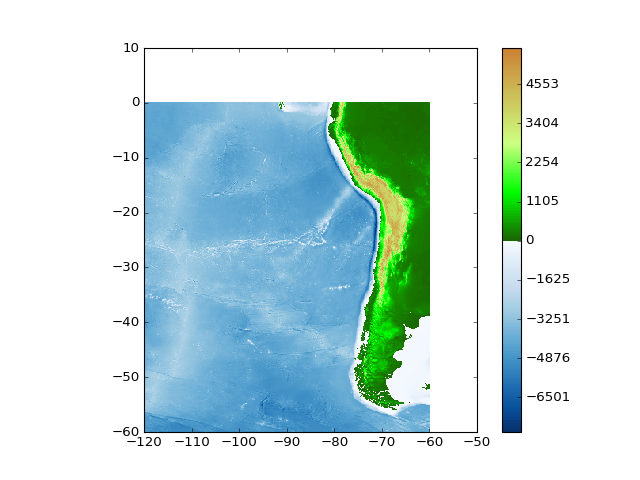

/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1215: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/jose/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1220: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


In [4]:
f = plt.figure()
ax = f.add_subplot(111)
ax.set_aspect(1.0 / np.cos(np.pi / 180.0 * mean_lat))
plt.pcolormesh(topo2.X, topo2.Y, topo2.Z, norm=norm,cmap=cmap)
plt.colorbar()
# plt.axis('equal')

# Define fault

## Fault parameters

Center

In [5]:
ll = np.array([-39.,-75.]) #lower left corner lat-lon
ur = np.array([-32.,-71.]) #upper right corner lat-lond
clat = 0.5*(ll[0]+ur[0])
clon = 0.5*(ll[1]+ur[1])

In [6]:
depth = 30100
strike = 18.
dip = 18.
L = 450000.
W = 150000.
rake =   112.
slip =  6.06

Project map coordinates. The center is in (0,0) by definition of the projection

In [7]:
stereographic_projection?
e,n = stereographic_projection(topo2.Y,topo2.X, clat, clon)

In [8]:
U3 = 1.0

uz1  = okada(n,e,depth,strike,dip,L,W,rake,slip,U3)

<IPython.core.display.Javascript object>


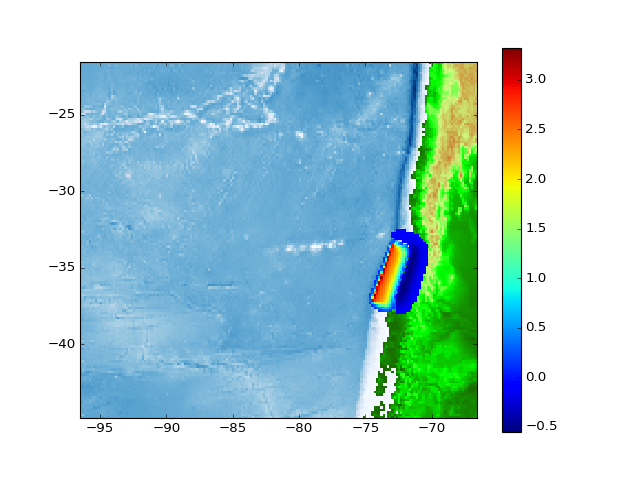

In [13]:
f = plt.figure()
ax = f.add_subplot(111)
ax.set_aspect(1.0 / np.cos(np.pi / 180.0 * mean_lat))
plt.pcolormesh(topo2.X, topo2.Y, topo2.Z, norm=norm,cmap=cmap)
plt.pcolormesh(topo2.X,topo2.Y,np.ma.masked_where(np.abs(uz1)<1e-1,uz1))
plt.colorbar()
